# Customer Churn Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 ### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking NULL values

In [9]:
df.isnull().sum().sum()

0

### descriptive analysis

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking Duplicate Values

In [11]:
df.duplicated().sum()

0

In [12]:
df["customerID"].duplicated().sum()

0

### converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [13]:
def conv(values):
    if values == 1:
        return "Yes"
    else:
        return "No"
    


df["SeniorCitizen"] =  df["SeniorCitizen"].apply(conv)    

In [14]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


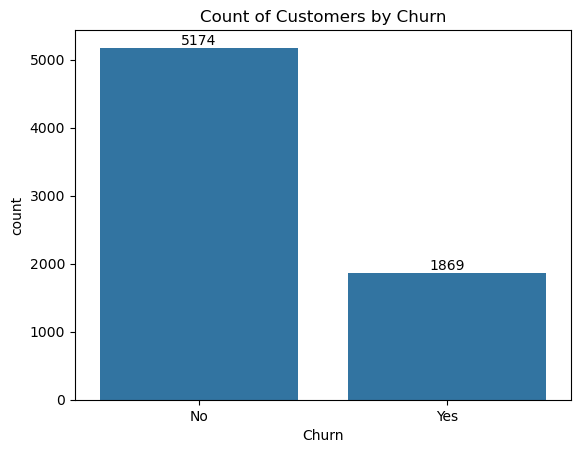

In [15]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

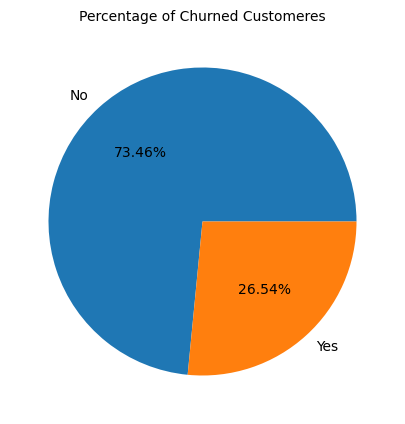

In [16]:
plt.figure(figsize = (10,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

### Conclusion -> from the given pie chart we can conclude that 26.54% of our customers have churned out.

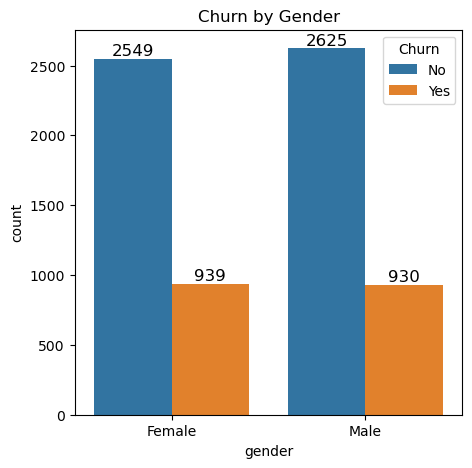

In [17]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")

for group in ax.containers:
    ax.bar_label(group, fontsize = (12))


# ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.show()

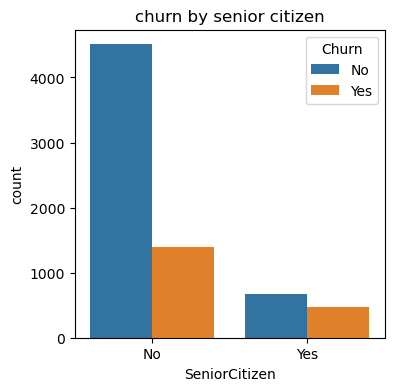

In [18]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue= "Churn")
plt.title("churn by senior citizen")
plt.show()

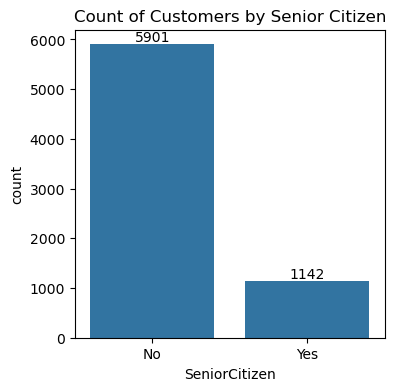

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

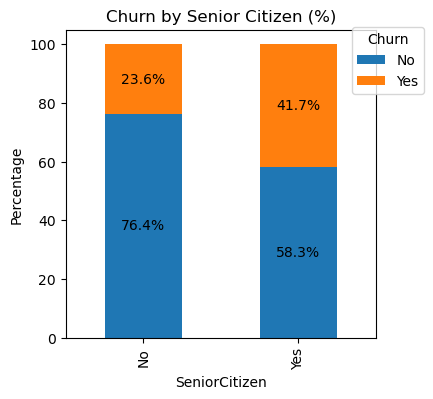

In [20]:
# Count how many people in each group
data = df.groupby(['SeniorCitizen','Churn']).size().unstack()

# Convert to percentage (row-wise)
data = data.div(data.sum(axis=1), axis=0) * 100

# Plot stacked bar
ax = data.plot(kind='bar', stacked=True, figsize=(4,4))

# Add % labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')


# Move legend outside (like 50-50 position)
plt.legend(title="Churn", bbox_to_anchor=(0.9, 0.9), loc='center left')  


plt.title("Churn by Senior Citizen (%)")
plt.ylabel("Percentage")
plt.show()


### Conclusion -> comparative a greater pecentage of people in senior citizen category have churned

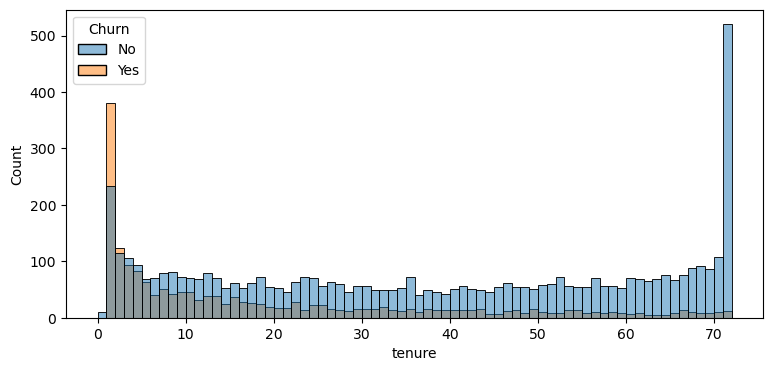

In [21]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

### Conclusion-> people who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months  have churned


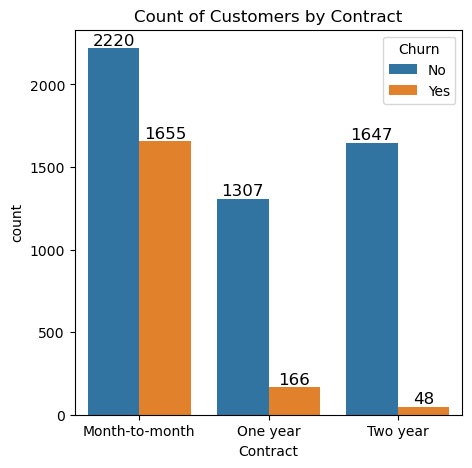

In [22]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")


for group in ax.containers:
    ax.bar_label(group, fontsize = (12))


# ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

### Conclusion ->people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

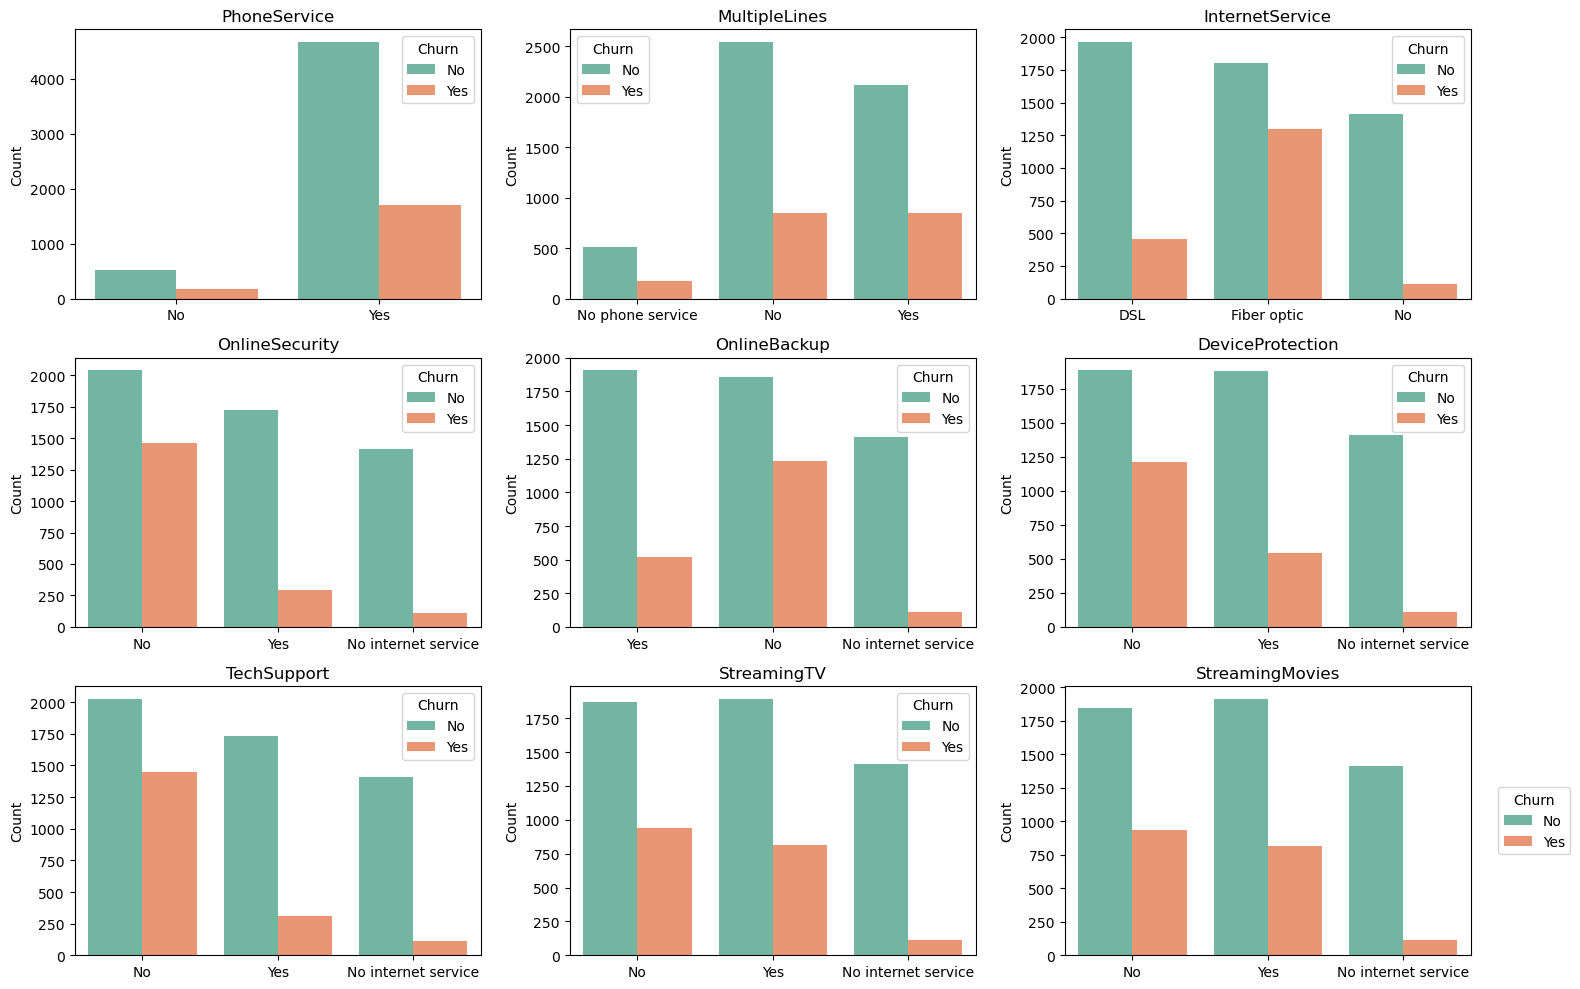

In [24]:


# Columns you want to visualize
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 10))  # create a big figure for all subplots

# Loop through each column
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # make a 3x3 grid of subplots
    sns.countplot(x=col, data=df, hue='Churn', palette='Set2')  # count plot with churn info
    plt.title(col)  # add title
    plt.xlabel('')  # remove x label for clean look
    plt.ylabel('Count')  # y-axis label
    # plt.xticks(rotation=180)  # rotate x labels for better visibility

plt.tight_layout()  # adjust spacing
plt.legend(title='Churn', bbox_to_anchor=(1.05, 0.5), loc='center left')  # move legend outside
plt.show()


### Conclusion-> The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

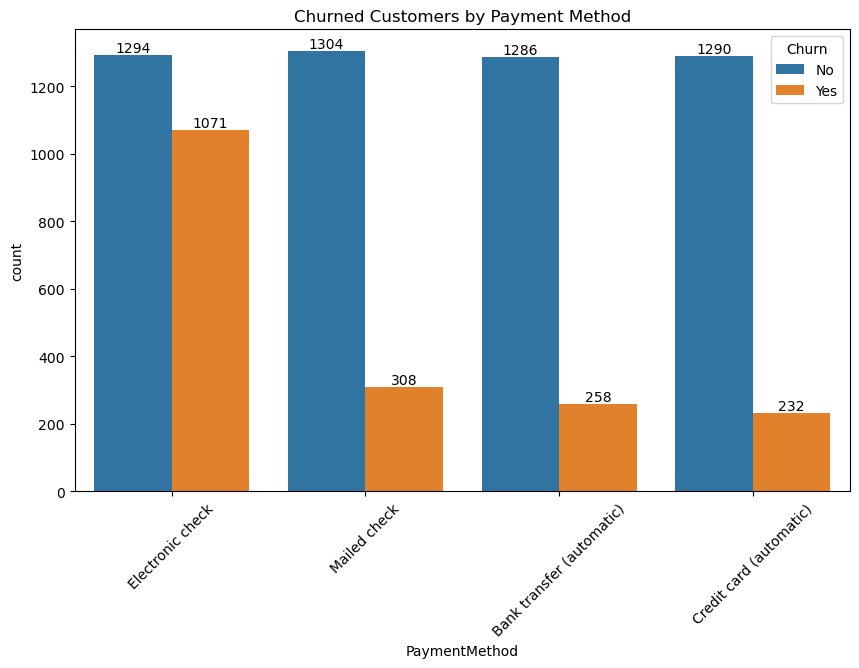

In [25]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

### Conclusion-> customer is likely to churn when he is using electronic check as a payment method. 

## New Questions

In [26]:
#Q1) Load the dataset and display the first 5 rows.

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
#Q2) Show the number of rows and columns in the dataset.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Concludion -> 7043 Rows and 21 Columns

In [28]:
#Q3)Display the data types of all columns.

df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
#Q4) Check if there are any missing values in the dataset.

df.isnull().sum().sum()

0

### Conclusion -> There is no missing values in this dataset

In [30]:
#Q5) Show the number of unique values in each categorical column.


col_categorical = df.select_dtypes(include='object').columns  # Checks Categorical Column

col_Numerical = df.select_dtypes(include='int').columns  # Checks Numerical Column

col_Float = df.select_dtypes(include='float').columns  # Checks Float Column

# print("\033[1;31mWarning: High Churn Detected!\033[0m") # Change text color to red


print("\033[1;96mCategorical Columns: ->\033[0m", col_categorical)
print()

print("\033[1;96mNumerical Columns: ->\033[0m", col_Numerical)
print()

print("\033[1;96mFloat Columns: ->\033[0m", col_Float)



Categorical Columns: -> Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

Numerical Columns: -> Index(['tenure'], dtype='object')

Float Columns: -> Index(['MonthlyCharges', 'TotalCharges'], dtype='object')


In [31]:
col_categorical = df.select_dtypes(include='object').columns

for col in df.columns:
    print(col, df[col].nunique())


customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


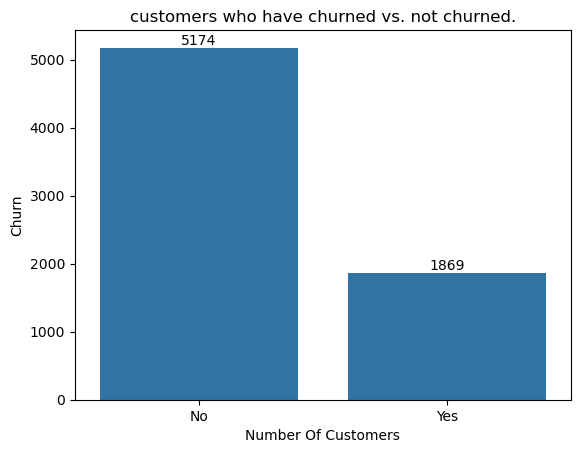

In [32]:
#Q6) Find the percentage of customers who have churned vs. not churned.

ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.xlabel("Number Of Customers")
plt.ylabel("Churn")
plt.title("customers who have churned vs. not churned.")
plt.show()

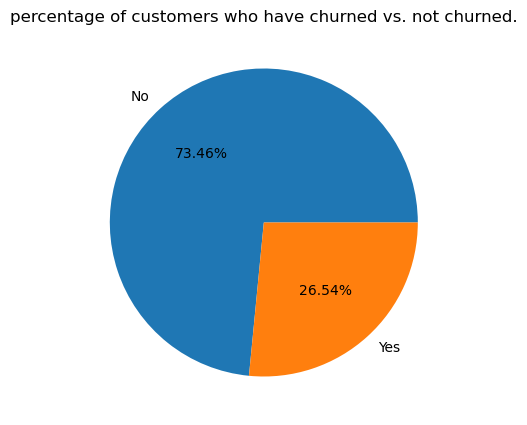

In [33]:
plt.figure(figsize=(5,5))

gb = df.groupby('Churn').agg({'Churn' : 'count'})

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of customers who have churned vs. not churned.")
plt.show()

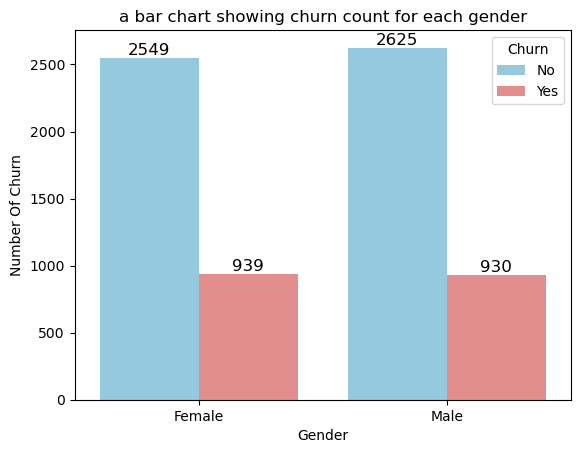

In [34]:
#Q7) Plot a bar chart showing churn count for each gender.

ax = sns.countplot(x = "gender", data = df, hue= "Churn" ,palette=["skyblue", "lightcoral"])

ax.bar_label(ax.containers[0], fontsize = (12))
ax.bar_label(ax.containers[1], fontsize = (12))

plt.xlabel("Gender")
plt.ylabel("Number Of Churn")

plt.title("a bar chart showing churn count for each gender")

plt.show()


In [35]:
#Q8) Show the distribution of customer tenure using a histogram.

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


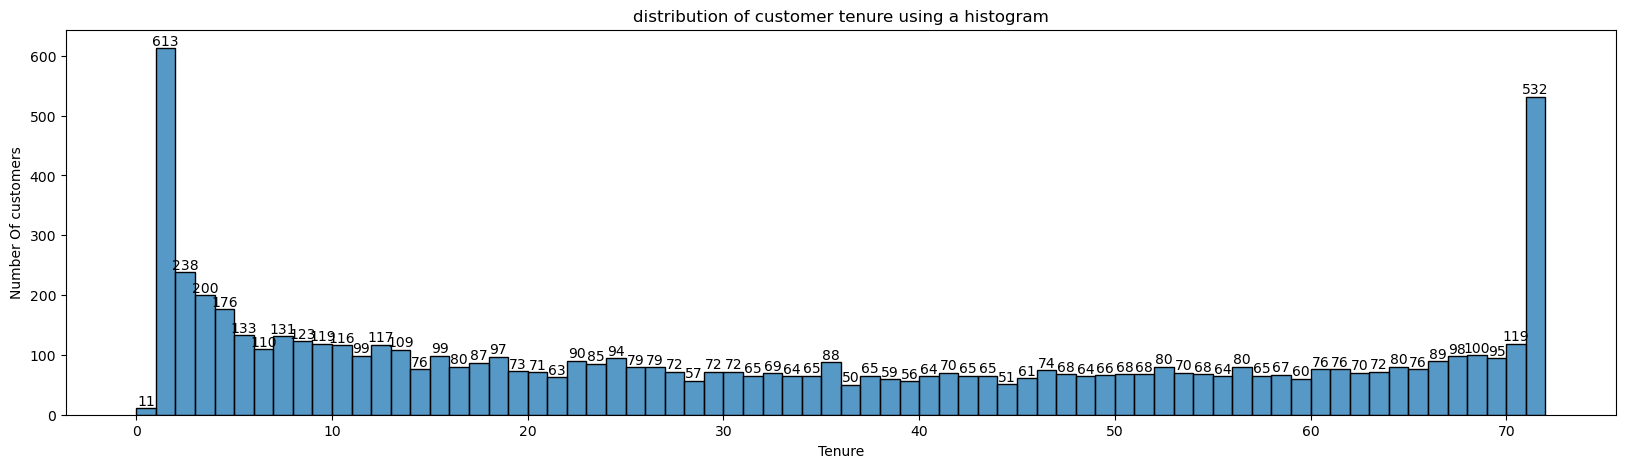

In [36]:
plt.figure(figsize=(20,5))


ax = sns.histplot(x = "tenure", data = df, bins = 72)

for group in ax.containers:
    ax.bar_label(group)
    
plt.xlabel("Tenure")
plt.ylabel("Number Of customers")
plt.title("distribution of customer tenure using a histogram")
plt.show()

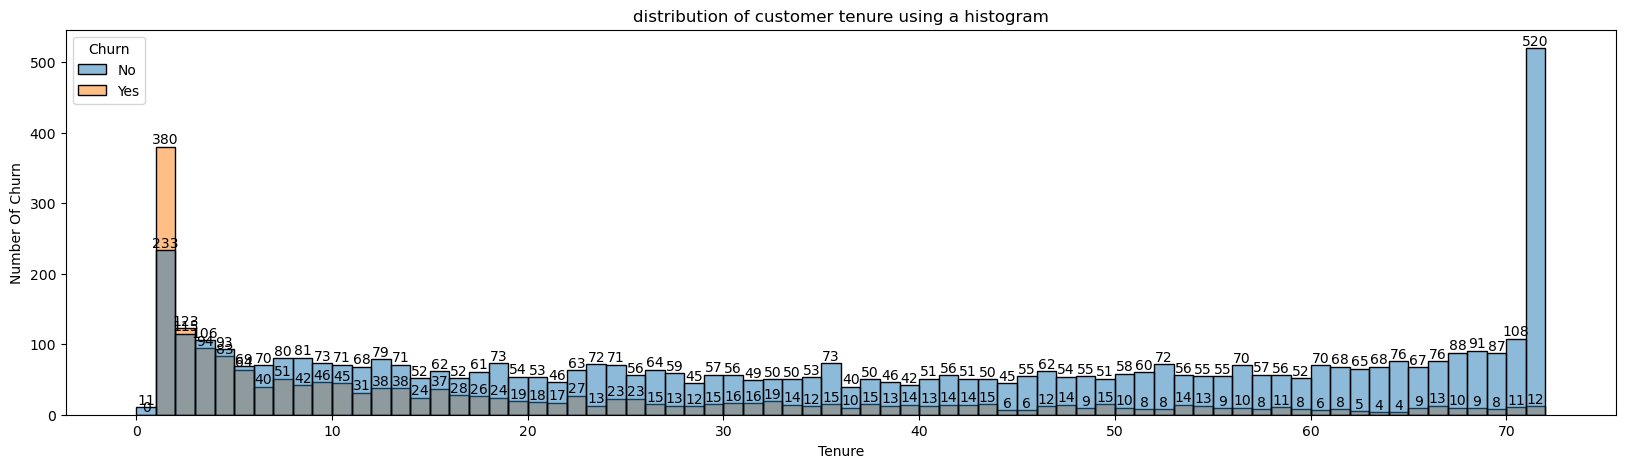

In [37]:
plt.figure(figsize=(20,5))


ax = sns.histplot(x = "tenure", data = df, bins = 72, hue= "Churn")

for group in ax.containers:
    ax.bar_label(group)
    
plt.xlabel("Tenure")
plt.ylabel("Number Of Churn")
plt.title("distribution of customer tenure using a histogram")
plt.show()

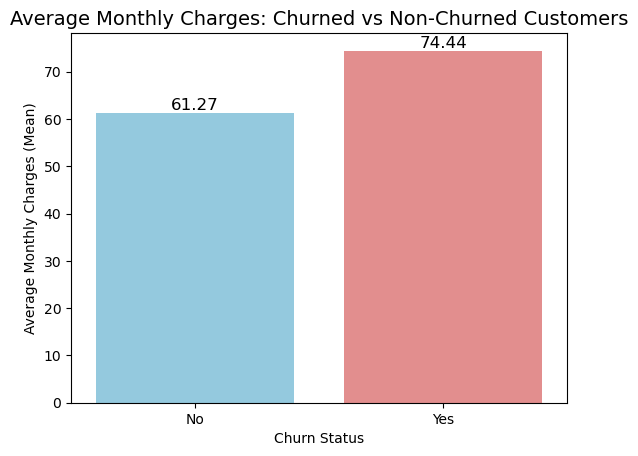

In [38]:
#9) Compare the average MonthlyCharges of churned vs. non-churned customers.

#  Calculate the mean MonthlyCharges for churned vs. non-churned
mean_values = df.groupby("Churn")["MonthlyCharges"].mean().reset_index()

#  Plot using hue (future-safe method)
ax = sns.barplot(
    x="Churn",
    y="MonthlyCharges",
    hue="Churn",             
    data=mean_values,
    palette=["skyblue", "lightcoral"],
    legend=False            
)

#  Add mean labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

# Step 4: Add chart labels and title
plt.title("Average Monthly Charges: Churned vs Non-Churned Customers", fontsize=14)
plt.xlabel("Churn Status")
plt.ylabel("Average Monthly Charges (Mean)")
plt.show()

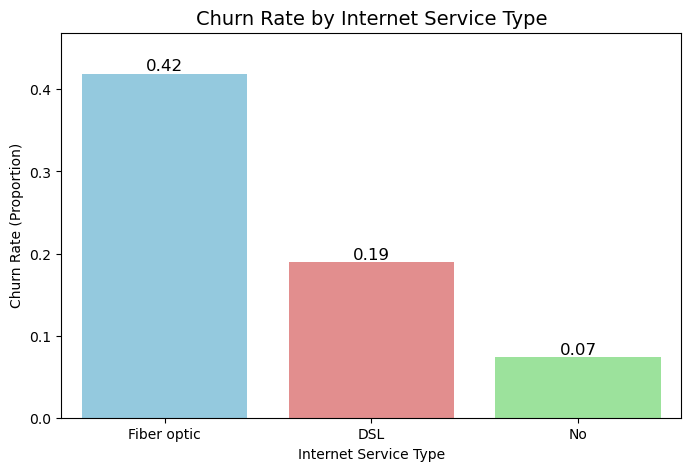

In [39]:
#Q10) Find which InternetService type has the highest churn rate


# Step 1: Calculate churn rate per InternetService type
churn_rate = (
    df.groupby("InternetService")["Churn"]
    .value_counts(normalize=True) 
    .rename("ChurnRate")
    .reset_index()
)

# Step 2: Keep only the "Yes" churn values
churn_rate = churn_rate[churn_rate["Churn"] == "Yes"]

# Step 3: Sort highest → lowest churn rate
churn_rate = churn_rate.sort_values(by="ChurnRate", ascending=False)

# Step 4: Create visualization
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x="InternetService",
    y="ChurnRate",
    data=churn_rate,
    hue="InternetService",                 
    palette=["skyblue", "lightcoral", "lightgreen"],
    legend=False
)

# Step 5: Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

# Step 6: Add labels & title
plt.title("Churn Rate by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate (Proportion)")
plt.ylim(0, churn_rate["ChurnRate"].max() + 0.05)
plt.show()

### Conclusion -> Fiber Optic InternetService type has the highest churn rate

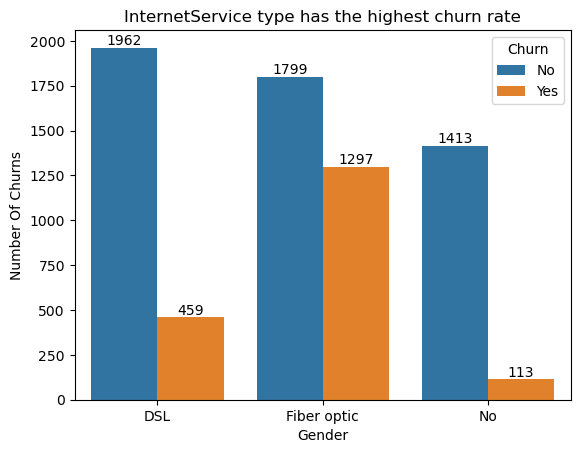

In [40]:
ax = sns.countplot(x = 'InternetService', data= df, hue = 'Churn')

for group in ax.containers:
    ax.bar_label(group)

plt.title("InternetService type has the highest churn rate")
plt.xlabel("Gender")
plt.ylabel("Number Of Churns")
plt.show()

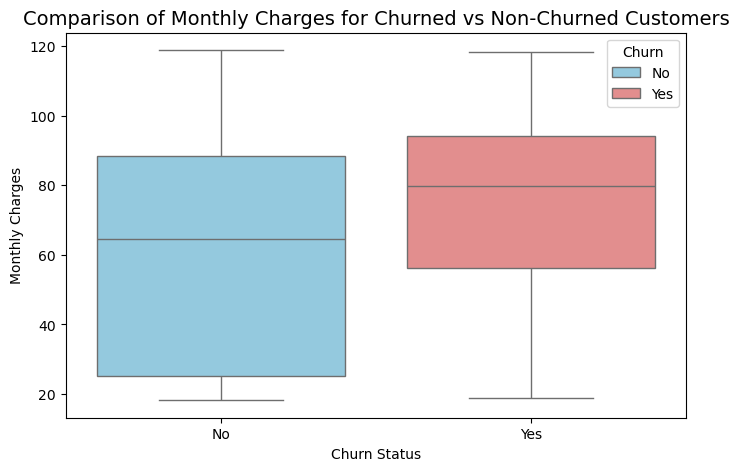

In [41]:
#Q11) Plot a boxplot comparing MonthlyCharges and Churn.

plt.figure(figsize=(8,5))
ax = sns.boxplot(
    x="Churn",
    y="MonthlyCharges",
    data=df,
    hue="Churn",                          
    palette=["skyblue", "lightcoral"],
    legend=True,
)


plt.title("Comparison of Monthly Charges for Churned vs Non-Churned Customers", fontsize=14)
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")
plt.grid(False)
plt.show()

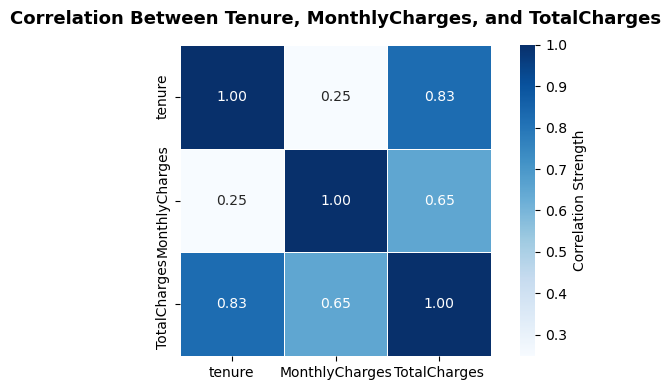

In [42]:
#Q12) Show the correlation between tenure, MonthlyCharges, and TotalCharges.



# Step 1: Select columns
corr_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Step 2: Compute correlation matrix
corr_matrix = corr_data.corr()

# Step 3: Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,                # show values
    fmt=".2f",                 # show 2 decimal places
    cmap="Blues",              # nice color palette
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Strength'}
)

# Step 4: Add title and beautify
plt.title('Correlation Between Tenure, MonthlyCharges, and TotalCharges',fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


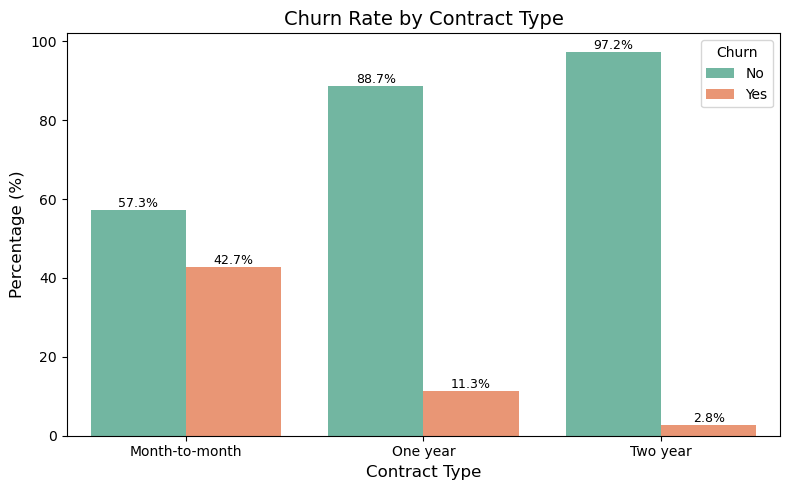

In [43]:
#Q13)Does Contract type affect churn rate? Show with a plot.



# Calculate churn percentage for each contract type
contract_churn = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
)

# Create a barplot for churn rate by contract type
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Percentage', hue='Churn', data=contract_churn, palette='Set2')

# Add percentage labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.title("Churn Rate by Contract Type", fontsize=14)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


### Conclusion -> Month-to-month customers show the highest churn percentage, meaning they are far more likely to leave.One year and Two year contracts have much lower churn, showing that longer contracts increase customer retention.



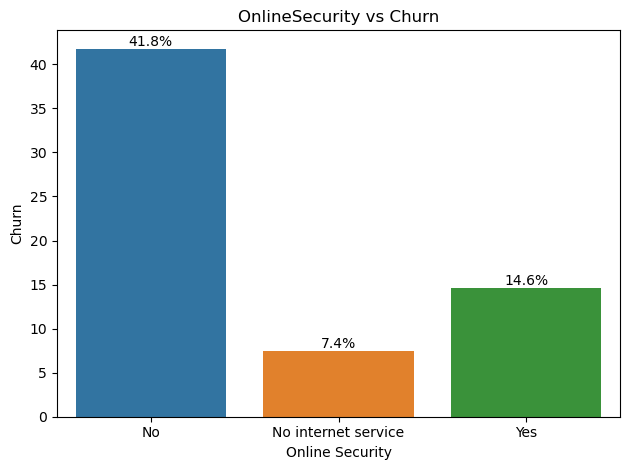

In [44]:
#Q14) Check if customers with OnlineSecurity = Yes have lower churn.

Online_churn = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

Online_churn_rate = Online_churn[Online_churn['Churn']=='Yes']
ax = sns.barplot(x='OnlineSecurity', y='percentage', hue='OnlineSecurity', data = Online_churn_rate)

for container in ax.containers:
  ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.title('OnlineSecurity vs Churn')
plt.xlabel('Online Security')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

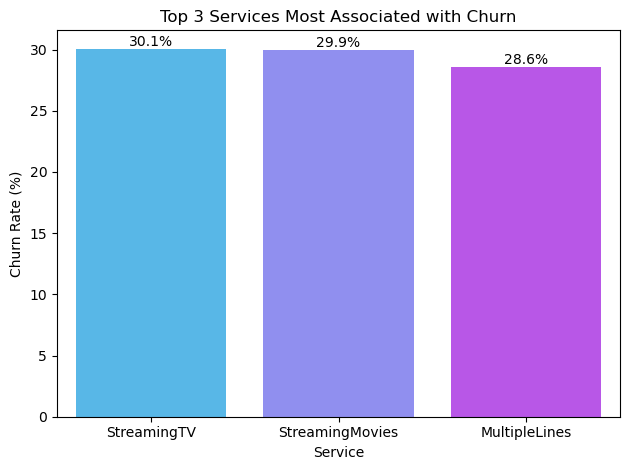

In [45]:
#Q15)Find the top 3 services (e.g., OnlineBackup, StreamingTV, TechSupport) most associated with churn.



# List of service columns (no duplicates)
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'DeviceProtection', 'OnlineBackup',
            'StreamingTV', 'StreamingMovies']

# Calculate churn rate for each service
churn_rate = {}
for col in services:
    yes_users = df[df[col] == 'Yes']
    if len(yes_users) > 0:
        churn_percent = (yes_users['Churn'].value_counts(normalize=True).get('Yes', 0)) * 100
        churn_rate[col] = churn_percent

# Convert to DataFrame and get top 3
top3 = pd.DataFrame(list(churn_rate.items()), columns=['Service', 'ChurnRate(%)'])
top3 = top3.sort_values(by='ChurnRate(%)', ascending=False).head(3)

# Plot
ax = sns.barplot(x='Service', y='ChurnRate(%)', hue='Service', data=top3, palette="cool", legend=False)
plt.title('Top 3 Services Most Associated with Churn')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Service')

#  Add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


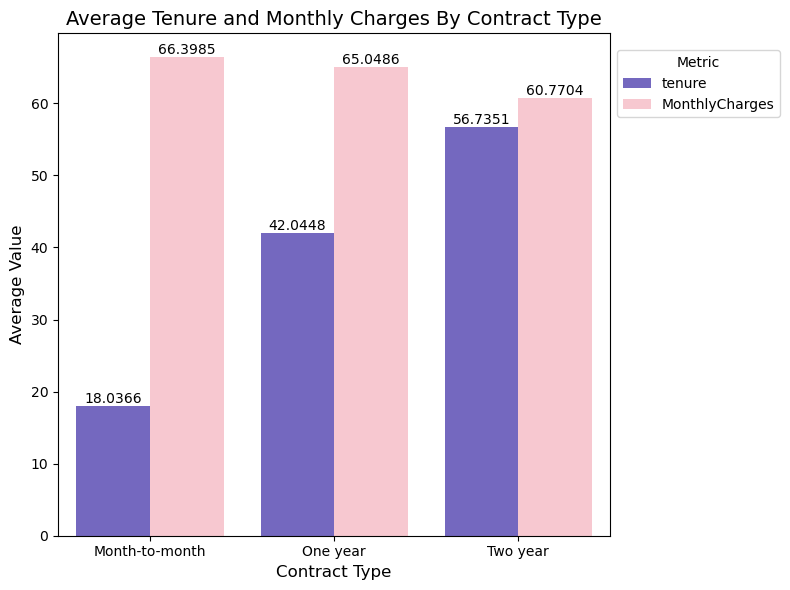

In [46]:
#Q16) Group customers by Contract and find the average tenure and MonthlyCharges

contract_info = df.groupby('Contract')[['tenure', 'MonthlyCharges']].mean().reset_index()


contract_melted = contract_info.melt(
    id_vars = 'Contract',
    value_vars = ['tenure', 'MonthlyCharges'],
    var_name = 'Metric',
    value_name = 'Average Value'

)



plt.figure(figsize=(8,6))
ax = sns.barplot(
    x = 'Contract',
    y = 'Average Value',
    hue= 'Metric',
    data = contract_melted,
    palette=['slateblue', 'pink']
)

for container in ax.containers:
    ax.bar_label(container)


plt.title("Average Tenure and Monthly Charges By Contract Type", fontsize = 14)
plt.xlabel("Contract Type", fontsize = 12)
plt.ylabel("Average Value", fontsize = 12)
plt.legend(title = 'Metric', bbox_to_anchor = (1,0.9), loc = 'center left')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

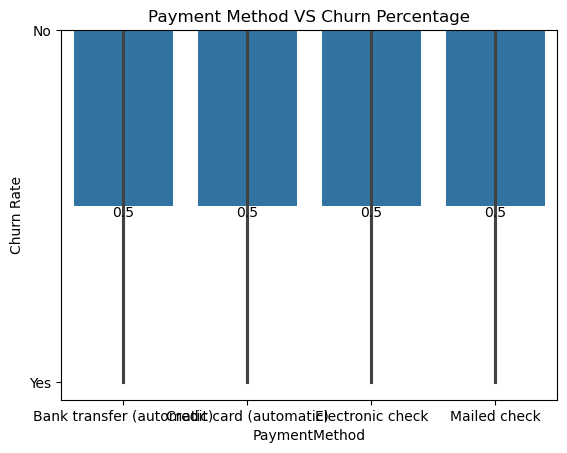

In [47]:
#Q17) Group by PaymentMethod and show the churn percentage for each.

PaymentMethod_Group = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

ax = sns.barplot(x = 'PaymentMethod', y = 'Churn', data= PaymentMethod_Group)

for container in ax.containers:
    ax.bar_label(container)


plt.title("Payment Method VS Churn Percentage")
plt.xlabel("PaymentMethod")
plt.ylabel("Churn Rate")
plt.show()

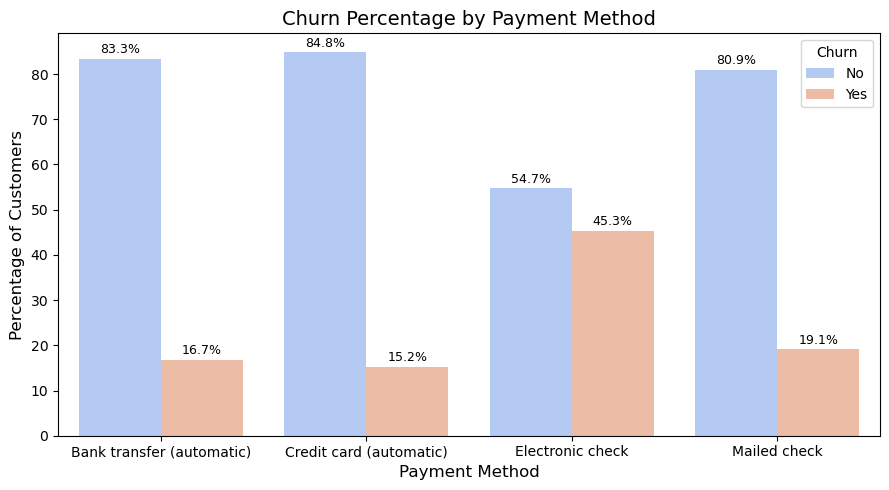

In [48]:


# 1️⃣ Group by PaymentMethod and Churn — get percentage
PaymentMethod_Group = (
    df.groupby('PaymentMethod')['Churn']
      .value_counts(normalize=True)
      .mul(100)
      .rename('Percentage')
      .reset_index()
)

# 2️⃣ Plot both churn categories (Yes / No)
plt.figure(figsize=(9,5))
ax = sns.barplot(
    x='PaymentMethod',
    y='Percentage',
    hue='Churn',           # separate bars for Yes and No
    data=PaymentMethod_Group,
    palette='coolwarm'     # blue-red color contrast
)

# 3️⃣ Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, fontsize=9)

# 4️⃣ Titles and labels
plt.title("Churn Percentage by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Percentage of Customers", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


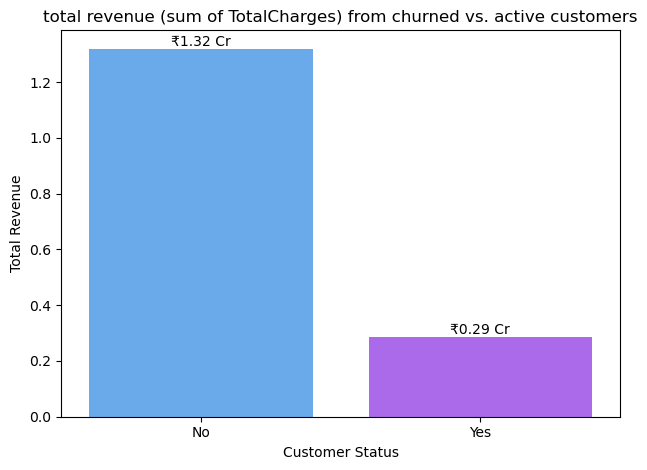

In [49]:
#Q18) Calculate the total revenue (sum of TotalCharges) from churned vs. active customers.

total_revenue = df.groupby('Churn')['TotalCharges'].sum().reset_index()

total_revenue['TotalCharges'] = total_revenue['TotalCharges'] / 1e7

ax = sns.barplot(x = 'Churn', y = 'TotalCharges', hue = 'Churn',data = total_revenue, palette= 'cool')


for container in ax.containers:
    ax.bar_label(container, fmt='₹%.2f Cr')


plt.title("total revenue (sum of TotalCharges) from churned vs. active customers")
plt.xlabel("Customer Status")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

In [50]:
#Q19)Encode categorical variables and check the shape of the new DataFrame.

df_encoded = pd.get_dummies(df, drop_first=True)
print("Shape of Encoded DataFrame:", df_encoded.shape)


Shape of Encoded DataFrame: (7043, 7073)


In [51]:
#Q20) Split the data into training and testing sets for predictive modeling (80%-20%).

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your encoded dataframe
# and 'Churn_Yes' is the target column after get_dummies()

# 1️⃣ Define X (features) and y (target)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# 2️⃣ Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 7072)
X_test shape: (1409, 7072)
y_train shape: (5634,)
y_test shape: (1409,)
